In [2]:
# boilerplate cell for stuff that comes out of the box with R, probably
# copied from https://github.com/Azure/RNNForTimeSeriesForecasting, because I am new to this stuff
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.tsa.stattools as sts
from glob import glob
from collections import UserDict
from IPython.display import Image, Markdown, display
from utils import Capturing
%matplotlib inline

# some kind soul ported a bunch of default R datasets (and more) into python, bless his soul
from pydataset import data as pdsd

pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(precision=4)

Original:
```R
x = NULL
x[1] = 0
for(i in 2:1000){
    x[i] = x[i-1]+rnorm(1)
}
random_walk=ts(x)
plot(random_walk, main="A random walk", ylab=" ", xlab=" Days", col="Blue", lwd=2)
```

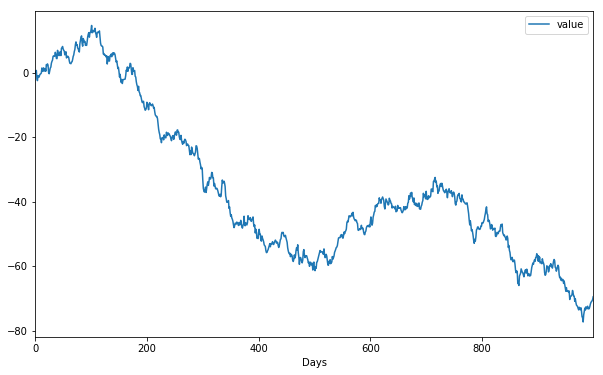

In [13]:
size = 1000

x = pd.DataFrame(np.array([np.array(range(size)),np.zeros(1000)]).T, columns=["Days","value"])
for i in range(1,1000):
    x['value'][i] = x['value'][i-1] + np.random.normal()
    
x.plot(x="Days",y="value",figsize=[10,6])

Original:
```R
acf(random_walk)
```

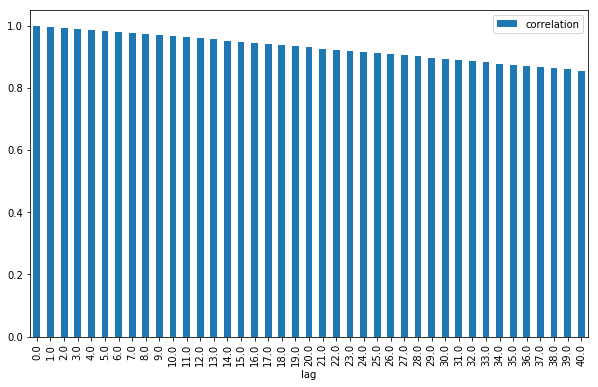

In [19]:
acorx = sts.acf(x['value'])
acorxframe = pd.DataFrame(np.array([np.array(range(len(acorx))),acorx]).T,columns=['lag','correlation'])
acorxframe.plot(x='lag',y='correlation',kind='bar',figsize=[10,6])

Original:
```R
plot(diff(random_walk))
```

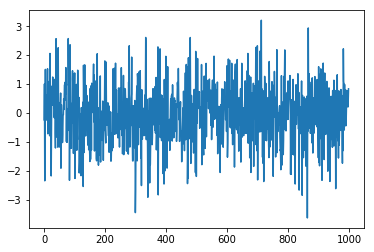

In [21]:
diffx = np.array([x['value'][i]-x['value'][i-1] for i in range(1,len(x['value']))])
plt.plot(diffx)

Original:
```R
acf(diff(random_walk))
```

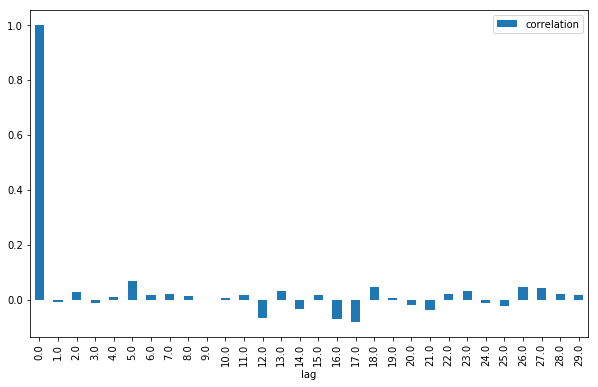

In [27]:
acordiff = sts.acf(diffx)
acordframe = pd.DataFrame(np.array([np.array(range(len(acordiff))),acordiff]).T,columns=['lag','correlation'])
acordframe[acordframe["lag"]<30].plot(x="lag",y="correlation",kind="bar",figsize=[10,6])